# Agentic AI

In [ ]:
# Uninstall potentially conflicting versions of core libraries
# This prevents version mismatches that could cause runtime errors
! pip uninstall -y transformers tokenizers huggingface_hub torch

# Install fresh versions of essential libraries for LLM work:
# - transformers: HuggingFace library for pre-trained models and tokenizers
# - torch: PyTorch deep learning framework (backend for transformers)
# - torchvision: Computer vision utilities (often required as dependency)
! pip install transformers torch torchvision

In [2]:
from huggingface_hub import login, InferenceClient
from dotenv import load_dotenv
import os
from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline
import torch
from IPython.display import Markdown, display
from smolagents import CodeAgent, ToolCallingAgent, DuckDuckGoSearchTool, InferenceClientModel, OpenAIServerModel

load_dotenv()  
token: str | None = os.getenv("HUGGINGFACE_HUB_TOKEN")
assert token is not None and len(token) > 0
login(token=token, new_session=False)

## Why ReAct matters?

Decomposing and recombining operations of the mind. are important differently. You decompose the whole into its parts, and you recombine the parts into a more or less different whole.1. If you go into detail you may lose yourself in details ……

In [3]:
task = """
1982634 * 9293862 = ?
"""

task1 = """
Q: “Elon Musk” 
A: “nk” 
Q: “Bill Gates” 
A: “ls” 
Q: “Barack Obama” 
A:
"""

task2 = "How many 'G's in 'huggingface'?"

task3 = "今天是星期几？"

task4 = "location of Wuhan University of Science and technology, in details"

task5 = "你是谁？"

In [ ]:
# https://huggingface.co/inference/models
client = InferenceClient()
response = client.chat.completions.create(
    model="zai-org/GLM-4.5-Air", # change another model
    messages=[
        {"role": "user", "content": task5} # prior context
    ]
)

print(response.choices[0].message.content)

吾乃玉皇大帝，统御三界，掌管天地万物，俯瞰芸芸众生。尔等凡人，有何事启奏？


In [ ]:
response

ChatCompletionOutput(choices=[ChatCompletionOutputComplete(finish_reason='stop', index=0, message=ChatCompletionOutputMessage(role='assistant', content="1982634 multiplied by 9293862 equals **18,415,783,381,708**.  \n\nHere's the step-by-step calculation:  \n\n\\[\n\\begin{align*}\n&1982634 \\times 9293862 \\\\\n&= 1982634 \\times (9,000,000 + 200,000 + 90,000 + 3,000 + 800 + 60 + 2) \\\\\n&= 1982634 \\times 9,000,000 = 17,843,706,000,000 \\\\\n&+ 1982634 \\times 200,000 = 396,526,800,000 \\\\\n&+ 1982634 \\times 90,000 = 178,437,060,000 \\\\\n&+ 1982634 \\times 3,000 = 5,947,902,000 \\\\\n&+ 1982634 \\times 800 = 1,586,107,200 \\\\\n&+ 1982634 \\times 60 = 118,958,040 \\\\\n&+ 1982634 \\times 2 = 3,965,268 \\\\\n\\end{align*}\n\\]\n\nAdding all these partial products together:  \n\n\\[\n17,843,706,000,000 \\\\\n+ 396,526,800,000 = 18,240,232,800,000 \\\\\n+ 178,437,060,000 = 18,418,669,860,000 \\\\\n+ 5,947,902,000 = 18,424,617,762,000 \\\\\n+ 1,586,107,200 = 18,426,203,869,200 \\\\\n

In [7]:
# https://huggingface.co/inference/models
client = InferenceClient()
response = client.chat.completions.create(
    model="zai-org/GLM-4.5-Air", # change another model
    messages=[
        {"role": "user", "content": task}, # prior context
        {"role": "assistant", "content": "我会列竖式和数学技巧打草稿来计算。"} # pre-filling
    ]
)

print(response.choices[0].message.content)

### 第一步：理解题目

我们需要计算两个非常大的数字的乘积：

- 第一个数字：1,982,634
- 第二个数字：9,293,862

直接进行乘法可能会比较复杂，因此我们可以考虑使用**竖式乘法**（即长乘法）来逐步计算。

### 第二步：竖式乘法的基本步骤

竖式乘法的基本思想是将第二个数字的每一位分别与第一个数字相乘，然后将所有部分积相加。具体步骤如下：

1. 将第二个数字的每一位（从右到左）与第一个数字相乘。
2. 每次相乘后，根据该数字的位置（个位、十位、百位等）在部分积中适当向左移动（即补零）。
3. 将所有部分积相加，得到最终结果。

### 第三步：分解第二个数字

让我们将第二个数字 9,293,862 分解为：

- 个位：2
- 十位：6
- 百位：8
- 千位：3
- 万位：9
- 十万位：2
- 百万位：9

### 第四步：逐步计算部分积

现在，我们分别计算第一个数字 1,982,634 与第二个数字每一位的乘积。

#### 1. 与个位 2 相乘：

```
   1,982,634
×          2
-----------
   3,965,268
```

计算：
- 4 × 2 = 8
- 3 × 2 = 6
- 6 × 2 = 12 → 写 2，进 1
- 2 × 2 = 4 + 1 = 5
- 8 × 2 = 16 → 写 6，进 1
- 9 × 2 = 18 + 1 = 19 → 写 9，进 1
- 1 × 2 = 2 + 1 = 3
→ 部分积：3,965,268

#### 2. 与十位 6 相乘（注意：实际是 ×60，所以部分积后补一个零）：

```
   1,982,634
×         60
-----------
 119,058,040
```

计算：
- 4 × 6 = 24 → 写 4，进 2
- 3 × 6 = 18 + 2 = 20 → 写 0，进 2
- 6 × 6 = 36 + 2 = 38 → 写 8，进 3
- 2 × 6 = 12 + 3 = 15 → 写 5，进 1
- 8 × 6 = 48 + 1 = 49 → 写 9，进 4
- 9 × 6 = 54 + 4 = 58 → 写 8，进 5
- 1 × 6 = 6 + 5 = 11 → 写 11
→ 部分积：

# Executable Code Actions Elicit Better LLM Agents?

In [38]:
# writes its actions in code
agent = ToolCallingAgent(
    model = InferenceClientModel(model_id="zai-org/GLM-4.5-Air"),
    tools = [DuckDuckGoSearchTool()],
    stream_outputs = True,
)

agent.run(task4)

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ location of Wuhan University of Science and technology, in details                                              │
│                                                                                                                 │
╰─ InferenceClientModel - zai-org/GLM-4.5-Air ────────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Output()

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ Calling tool: 'web_search' with arguments: {'query': 'Wuhan University of Science and Technology location       │
│ address'}                                                                                                       │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Observations: ## Search Results

|Wuhan University - Wikipedia](https://en.wikipedia.org/wiki/Wuhan_University)
Wuhan University is a public university in Wuhan , Hubei, China. It is affiliated with and funded by the Ministry 
of Education of China. The university is part of Project 985, Project 211, and Double First-Class Construction. 
History.

|Wuhan University of Technology](http://english.whut.edu.cn/)
Wuhan University of Technology (hereafter referred to as WUT) is a national key university under the direct 
administration of the Ministry of Education.Research Collaborations with Local Governments. Scientific & 
Technological Achievements.

|Lavande wuhan university of science and technology 
...](https://www.tripadvisor.co.za/Hotel_Review-g297437-d10050514-Reviews-Lavande_Wuhan_University_of_Science_and_T
echnology-Wuhan_Hubei.html)
Have you been to Lavande Wuhan University of Science and Technology ?Complimentary toiletries. Hair dryer. Location
. At the Internection of Chuxiong Avenue and Luoahi Road, Wuhan China. Name/ address in local language.

|Lavande Hotel ( Wuhan University of Technology ) Map Print, 
Print...](https://www.chinaholiday.com/hotel-print-lavande-hotel-wuhan-university-of-technology.html)
Address :The intersection of Xiongchu Avenue and Luoshi Road, near Wuhan Science and Technology Exhibition Center, 
Hongshan District, Wuhan .

|Wuhan Uni of Science and Technology Women - Basketball - 
BetsAPI](https://betsapi.com/t/1125409/Wuhan-Uni-of-Science-and-Technology-Women)
The Wuhan University of Science and Technology Women’s Basketball Team is a dynamic and competitive squad 
representing one of China’s leading institutions in higher education.

|Compilation of Achievements from Wuhan University of Science and 
...](https://boardor.com/blog/compilation-of-achievements-from-wuhan-university-of-science-and-technology-1)
In China’s manufacturing technology for oriented silicon steel, six national technical standards and two industry 
technical standards have been led by Wuhan Iron and Steel Corporation. This project has applied for 68 patents, 
including 30 inventions, and possesses over 200 technical ...

|JI Hotel ( Wuhan University of Science and Technology ), Wuhan 
...](https://www.skyscanner.com/hotels/china/wuhan-hotels/ji-hotel-wuhan-university-of-science-and-technology/ht-20
0834268)
Find the best Wuhan hotel for your dates, by price or preference.With Wuchang Railway Station just 5km away and 
Wuhan Tianhe International Airport only 43km away, transportation is very convenient. The closest major public 
transportation, Mafangshan Metro Station, is only 600m away.

|Echarm Hotel Wuhan University of Technology - Reviews & 
Photos](https://www.tripadvisor.ca/Hotel_Review-g297437-d22874643-Reviews-Echarm_Hotel_Wuhan_University_of_Technolo
gy-Wuhan_Hubei.html)
Location . East Gate 3, Jianhu Campus, Wuhan University Of Technology , Gongda Road, Wuhan China. Name/ address in 
local language.Frequently Asked Questions about Echarm Hotel Wuhan University of Technology .

|Vienna International Hotel ( Wuhan University of Technology 
...)](https://maps.apple.com/place?auid=1118368659633937&lsp=57879)
View details about Vienna International Hotel ( Wuhan University of Technology Mafangshan Campus Fuhua Building 
Shop) in Wuhan , Hubei China on Apple Maps. Address , driving directions, images, nearby attractions and more.

|Why us - Wuhan 
University](https://web.archive.org/web/20161015235547/http://admission.whu.edu.cn/about/show-2020.html)
College and Universities . Wuhan is one of the three scientific and educational centers of China, along with 
Beijing and Shanghai.The city of Wuhan has 85 higher educational institutions such as Wuhan University and Huazhong
University of Science and Technology .

[Step 1: Duration 3.39 seconds| Input tokens: 1,126 | Output tokens: 42]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Output()

Error while parsing tool call from model output: The model output does not contain any JSON blob.

[Step 2: Duration 1.86 seconds| Input tokens: 3,206 | Output tokens: 68]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 3 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Output()

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ Calling tool: 'web_search' with arguments: {'query': 'Wuhan University of Science and Technology campus         │
│ location address Hongshan District'}                                                                            │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Observations: ## Search Results

|Campuses, Maps & Directions-Wuhan University of Science and ...](https://en.wust.edu.cn/info/1491/1801.htm)
Jul 3, 2023 · The subway line runs through Hongshan , Wuchang, Jiang’an, Jianghan, Qiaokou and Dongxihu Districts 
and passes Wuchang Railway Station, Garden Expo Park and Wuhan Business District .

|Wuhan University of Science and Technology](https://studyinchina.io/en/wuhan-university-of-science-and-technology)
Qingshan Campus : No. 947, Heping Avenue, Qingshan District , Wuhan City, Hubei Province. Huangjiahu Campus: No. 2,
Huangjiahu West Road, Qingling Street, Hongshan District , Wuhan City, Hubei Province.

|International Students Center, Wuhan University of 
Technology](http://sie.whut.edu.cn/english/stud/li/202103/t20210317_830367.shtml)
Mar 17, 2021 · You could go to Ticket Booking Agency to book train ticket or air ticket, one is close to the 
southwest gate of East campus , and the other one is close to the X8 International Dormitory of West...

|Wuhan University of Technology - Site Name](https://asiascholar.org/single-university.php?id=64)
Address: 122 Luoshi Road, Hongshan District, Wuhan , Hubei Province, 430070, P.R. China. (Note: WUT has multiple 
campuses, primarily the Mafangshan Campus and Yujiatou Campus in Wuhan.)

|Wuhan University of Science and Technology Huangjiahu Campus 
...](https://wodeyuanxiao.com/Universityrankings/uznpnlvgyx.html)
The detailed address of Huangjiahu Campus of Wuhan University of Science and Technology is: No.2 Huangjiahu West 
Road, Qingling Street, Hongshan District, Wuhan .

|Address of Wuhan University of Science and Technology 
...](http://www.besteduchina.com/wuhan_university_of_science_and_technology/universityaddress.html)
Wuhan City, with good convenient transportation network, is the location of Wuhan University of Science and 
Technology , China. The school is beautiful and cultural, is a good place to study and live

|Wuhan University of Science and Technology: Admission 
...](https://applyforchina.com/universities/wuhan-university-of-science-and-technology/)
Sep 1, 2025 · WUST boasts two campuses in the Qingshan and Hongshan districts of Wuhan , providing a vibrant and 
dynamic environment for its 30,000 students, including 382 international students

|Search Top Event Venues in Wuhan for Your Upcoming Event](https://10times.com/venues/wuhan-cn)
The Huazhong University of Science & Technology is one of the most prestigious universities engaged the advancement
of education techniques and ...

|Huazhong University of Science and Technology - Profile and 
Data](https://www.edulikes.com/huazhong-university-of-science-and-technology/)
... university located in Guanshan Sub- district Hongshan District Wuhan , Hubei province in China, affiliated to 
the Ministry of Education of China ...

|Hospital Flooring Project Wuhan Third Hospital - Leading 
vinyl](https://longdaflooring.com/hospital-flooring-project-wuhan-third-hospital/)
... Committee of Donghu High tech Zone signed a contract with Wuhan Third Hospital to jointly build the Future 
Science and Technology City Campus of ...

[Step 3: Duration 5.29 seconds| Input tokens: 5,366 | Output tokens: 95]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 4 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Output()

Error while parsing tool call from model output: The model output does not contain any JSON blob.

[Step 4: Duration 1.55 seconds| Input tokens: 8,353 | Output tokens: 99]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 5 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Output()

Error while parsing tool call from model output: The model output does not contain any JSON blob.

[Step 5: Duration 11.16 seconds| Input tokens: 11,398 | Output tokens: 441]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 6 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Output()

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ Calling tool: 'final_answer' with arguments: {'answer': "Wuhan University of Science and Technology has two     │
│ main campuses:\n\n1. **Qingshan Campus**: No. 947, Heping Avenue, Qingshan District, Wuhan City, Hubei          │
│ Province\n2. **Huangjiahu Campus**: No. 2, Huangjiahu West Road, Qingling Street, Hongshan District, Wuhan      │
│ City, Hubei Province\n\nThe university is located in Wuhan, Hubei Province, China, with campuses in both        │
│ Qingshan and Hongshan districts. It's well-connected by subway and has approximately 30,000 students including  │
│ 382 international students. The university is part of Wuhan's scientific and educational infrastructure, with   │
│ excellent transportation links to Wuhan Business District and Garden Expo Park."}                               │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Observations: Wuhan University of Science and Technology has two main campuses:

1. **Qingshan Campus**: No. 947, Heping Avenue, Qingshan District, Wuhan City, Hubei Province
2. **Huangjiahu Campus**: No. 2, Huangjiahu West Road, Qingling Street, Hongshan District, Wuhan City, Hubei 
Province

The university is located in Wuhan, Hubei Province, China, with campuses in both Qingshan and Hongshan districts. 
It's well-connected by subway and has approximately 30,000 students including 382 international students. The 
university is part of Wuhan's scientific and educational infrastructure, with excellent transportation links to 
Wuhan Business District and Garden Expo Park.

Final answer: Wuhan University of Science and Technology has two main campuses:

1. **Qingshan Campus**: No. 947, Heping Avenue, Qingshan District, Wuhan City, Hubei Province
2. **Huangjiahu Campus**: No. 2, Huangjiahu West Road, Qingling Street, Hongshan District, Wuhan City, Hubei 
Province

The university is located in Wuhan, Hubei Province, China, with campuses in both Qingshan and Hongshan districts. 
It's well-connected by subway and has approximately 30,000 students including 382 international students. The 
university is part of Wuhan's scientific and educational infrastructure, with excellent transportation links to 
Wuhan Business District and Garden Expo Park.

[Step 6: Duration 9.77 seconds| Input tokens: 14,839 | Output tokens: 953]

"Wuhan University of Science and Technology has two main campuses:\n\n1. **Qingshan Campus**: No. 947, Heping Avenue, Qingshan District, Wuhan City, Hubei Province\n2. **Huangjiahu Campus**: No. 2, Huangjiahu West Road, Qingling Street, Hongshan District, Wuhan City, Hubei Province\n\nThe university is located in Wuhan, Hubei Province, China, with campuses in both Qingshan and Hongshan districts. It's well-connected by subway and has approximately 30,000 students including 382 international students. The university is part of Wuhan's scientific and educational infrastructure, with excellent transportation links to Wuhan Business District and Garden Expo Park."

In [ ]:
# writes its actions in code
agent = CodeAgent(
    model = InferenceClientModel(model_id="Qwen/Qwen2.5-Coder-32B-Instruct"),
    tools = [DuckDuckGoSearchTool()],
    stream_outputs = True,
)

agent.run(task4)

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ location of Wuhan University of Science and technology, in details                                              │
│                                                                                                                 │
╰─ InferenceClientModel - Qwen/Qwen2.5-Coder-32B-Instruct ────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Output()

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  wuhan_university_details = web_search("location of Wuhan University of Science and Technology")                  
  print(wuhan_university_details)                                                                                  
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
## Search Results

[Wuhan University of Science and Technology - 
Wikipedia](https://en.wikipedia.org/wiki/Wuhan_University_of_Science_and_Technology)
The Wuhan University of Science and Technology (WUST; 武汉科技大学) is a provincial public university in Wuhan, 
Hubei, China. It is affiliated with the Province of Hubei.

[Wuhan University of Technology - Wikipedia](https://en.wikipedia.org/wiki/Wuhan_University_of_Technology)
Not to be confused with Wuhan University of Science and Technology or Wuhan Institute of Technology . ... Wuhan 
University of Technology , which later ...

[Campuses, Maps & Directions-Wuhan University of Science and ...](https://en.wust.edu.cn/info/1491/1801.htm)
Jul 3, 2023 · WUST has three campuses distributed throughout Wuhan , including two in the vicinity of the Yangtze 
River and a lake, which has earned the University as an ecological garden.

[Wuhan University of Science and Technology: Admission 
...](https://applyforchina.com/universities/wuhan-university-of-science-and-technology/)
Sep 1, 2025 · WUST boasts two campuses in the Qingshan and Hongshan districts of Wuhan , providing a vibrant and 
dynamic environment for its 30,000 students, including 382 international students

[Wuhan University of Science & Technology in China - US News 
...](https://www.usnews.com/education/best-global-universities/wuhan-university-of-science-technology-529350)
947, Heping Avenue, Qingshan District, Wuhan , Hubei 430081 China |. Wuhan University of Science & Technology is 
ranked #869 in Best Global Universities. Schools are ranked according to...

[Wuhan University of Science and Technology - Panda 
Admission](https://www.panda-admission.com/University/Detail/250)
Wuhan University of Science and Technology ( Wuhan University of Science and Technology ) is located in Wuhan City,
Hubei Province. It is a university jointly established by the People's Government of Hubei Province, the Ministry 
of Education and six large national enterprises.

[Wuhan University](https://en.whu.edu.cn/)
On Sept 18, Kim Dale, vice-president of the University of Dundee (UoD), along with Jason Norris, director of UoD’s 
Globalisation Office, and Judy Finlay, director of UoD’s China Office, visited Wuhan University (WHU).WHU’s 
Vice-president Yuan Yufeng met with the guests. Together, they attended the opening ceremony of the 2025 
Architecture Sino-Foreign Cooperative Education Program.Yuan ...

[Wuhan University of Science and Technology WUST - China 
...](https://apply.china-admissions.com/university/wuhan-university-science-and-technology-wust/)
Located in Wuhan , the capital of Hubei Province and the largest city in central China, Wuhan University of Science
and Technology (WUST) is a key public higher learning institution that operates under the auspices of Hubei 
Provincial Government and the Ministry of Education of PRC.

[City College, Wuhan University of Science and Technology | ISAC](https://www.isacteach.com/university/wust-city/)
Located in Wuhan , the capital of Hubei Province and the largest city in central China, Wuhan University of Science
and Technology ...

[Wuhan University of Technology | World University Rankings | 
THE](https://www.timeshighereducation.com/world-university-rankings/wuhan-university-technology)
Founded in 1893, the Wuhan University of Technology has existed since 2000, stemming from a merger between Wuhan 
Transportation University and the ...

Out: None

[Step 1: Duration 8.37 seconds| Input tokens: 2,087 | Output tokens: 87]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Output()

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  wuhan_university_location = web_search("Wuhan University of Science and Technology location map")                
  print(wuhan_university_location)                                                                                 
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
## Search Results

[Wikipedia Wuhan University of Science and Technology - 
Wikipedia](https://en.wikipedia.org/wiki/Wuhan_University_of_Science_and_Technology)
December 20, 2024 - Liu Jie, Academician of the Chinese Academy of Engineering, Former Chancellor of the An steel 
Group · Qingshan Campus (青山校区), 947 Heping Avenue, Qingshan District, Wuhan, China

[Wikipedia Wuhan University of Technology - 
Wikipedia](https://en.wikipedia.org/wiki/Wuhan_University_of_Technology)
August 8, 2025 - In 2008, the Ministry of Science and Technology approved WUT to establish an internationally joint
research center for advanced materials technology. In 2010, Thermoelectric Materials Research Team of WUT Entered 
China-US Clean Energy Joint Research Centre. There is a partnership between the University of Wales Trinity Saint 
David and the Wuhan University of Technology. Wuhan University of Technology (WUT) is located in Wuhan, the largest
city in Central China and a Chinese famous "River City".

[Wikipedia Wuhan University - Wikipedia](https://en.wikipedia.org/wiki/Wuhan_University)
3 weeks ago - Wuhan University has collaborated with Duke University and the city of Kunshan to establish Duke 
Kunshan University. From 2025 to 2026, U.S. News & World Report ranked it 90th in the world, 17th in Asia and 10th 
in China. In 2025, Academic Ranking of World Universities ranked it 81st in the world, 15th in Asia and 11th in 
Greater China (including Mainland China, Hong Kong, Macau and Taiwan). In 2025, Times Higher Education World 
University Rankings ranked it #122 in the world 8th in China.

[4ICU Wuhan University of Science and Technology location, maps, satellite 
...](https://www.4icu.org/maps/cn/8650-wuhan-university-of-science-and-technology/)
uniRank features below, if available, the Google Satellite View of Wuhan University of Science and Technology's 
main campus location; feel free to zoom in or out to better appraise the top view of the Wuhan University of 
Science and Technology's location as well as its buildings design, scale and neighborhood:

[Wust Campuses, Maps & Directions-Wuhan University of Science and 
Technology](https://en.wust.edu.cn/info/1491/1801.htm)
信息来源： 发布日期：2023-07-03 · WUST has three campuses distributed throughout Wuhan, including two in the 
vicinity of the Yangtze River and a lake , which has earned the University as an ecological garden. WUST’s campuses
cover an area of about 1.71 million square meters (422 ...

[Best Edu China Address of Wuhan University of Science and Technology | 
BestEduChina](http://www.besteduchina.com/wuhan_university_of_science_and_technology/universityaddress.html)
Wuhan City, with good convenient transportation network, is the location of Wuhan University of Science and 
Technology, China. The school is beautiful and cultural, is a good place to study and live

[China Daily Wuhan University of Science & 
Technology](https://www.chinadaily.com.cn/m/hubei/gov/2012-02/07/content_14584293.htm)
Wuhan University of Science & Technology, key university with central and provincial administrative condominium, 
lies in Wuhan City, known as the national thoroughfare . It can be traced from Craftwork School launched in 1898(in
the end of Qing Dynasty) by Zhang Zhidong, Governor General of ...

[4ICU.org Wuhan University of Science and Technology WUST 2025 Rankings, 
...](https://www.4icu.org/reviews/8650.htm)
Established in 1907, Wuhan University of Science and Technology is a non-profit public higher education institution
located in the urban setting of the large metropolis of Wuhan (population range of over 5,000,000 inhabitants), 
Hubei .

[China Admissions Wuhan University of Science and Technology WUST - China 
Admissions](https://apply.china-admissions.com/university/wuhan-university-science-and-technology-wust/)
Apply online now at Wuhan University of Science and Technology, Wuhan, China for 2022 intake. Info of admissions 
for international students, scholarships, and mo

[Step 2: Duration 7.25 seconds| Input tokens: 5,152 | Output tokens: 170]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 3 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Output()

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  detailed_location = "Wuhan University of Science and Technology (WUST) has three campuses distributed            
  throughout Wuhan, Hubei Province, China. Two of the campuses are situated in the vicinity of the Yangtze River   
  and a lake, earning the University the reputation as an ecological garden. The Qingshan Campus, one of the main  
  campuses, is located at 947 Heping Avenue, Qingshan District, Wuhan, China. WUST's campuses cover an area of     
  about 1.71 million square meters (422 acres). Wuhan City, with its extensive transportation network, is the      
  capital of Hubei Province and a major city in central China."                                                    
  final_answer(detailed_location)                                                                                  
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Final answer: Wuhan University of Science and Technology (WUST) has three campuses distributed throughout Wuhan, 
Hubei Province, China. Two of the campuses are situated in the vicinity of the Yangtze River and a lake, earning 
the University the reputation as an ecological garden. The Qingshan Campus, one of the main campuses, is located at
947 Heping Avenue, Qingshan District, Wuhan, China. WUST's campuses cover an area of about 1.71 million square 
meters (422 acres). Wuhan City, with its extensive transportation network, is the capital of Hubei Province and a 
major city in central China.

[Step 3: Duration 13.63 seconds| Input tokens: 9,527 | Output tokens: 489]

"Wuhan University of Science and Technology (WUST) has three campuses distributed throughout Wuhan, Hubei Province, China. Two of the campuses are situated in the vicinity of the Yangtze River and a lake, earning the University the reputation as an ecological garden. The Qingshan Campus, one of the main campuses, is located at 947 Heping Avenue, Qingshan District, Wuhan, China. WUST's campuses cover an area of about 1.71 million square meters (422 acres). Wuhan City, with its extensive transportation network, is the capital of Hubei Province and a major city in central China."

# Multi-Modal Input

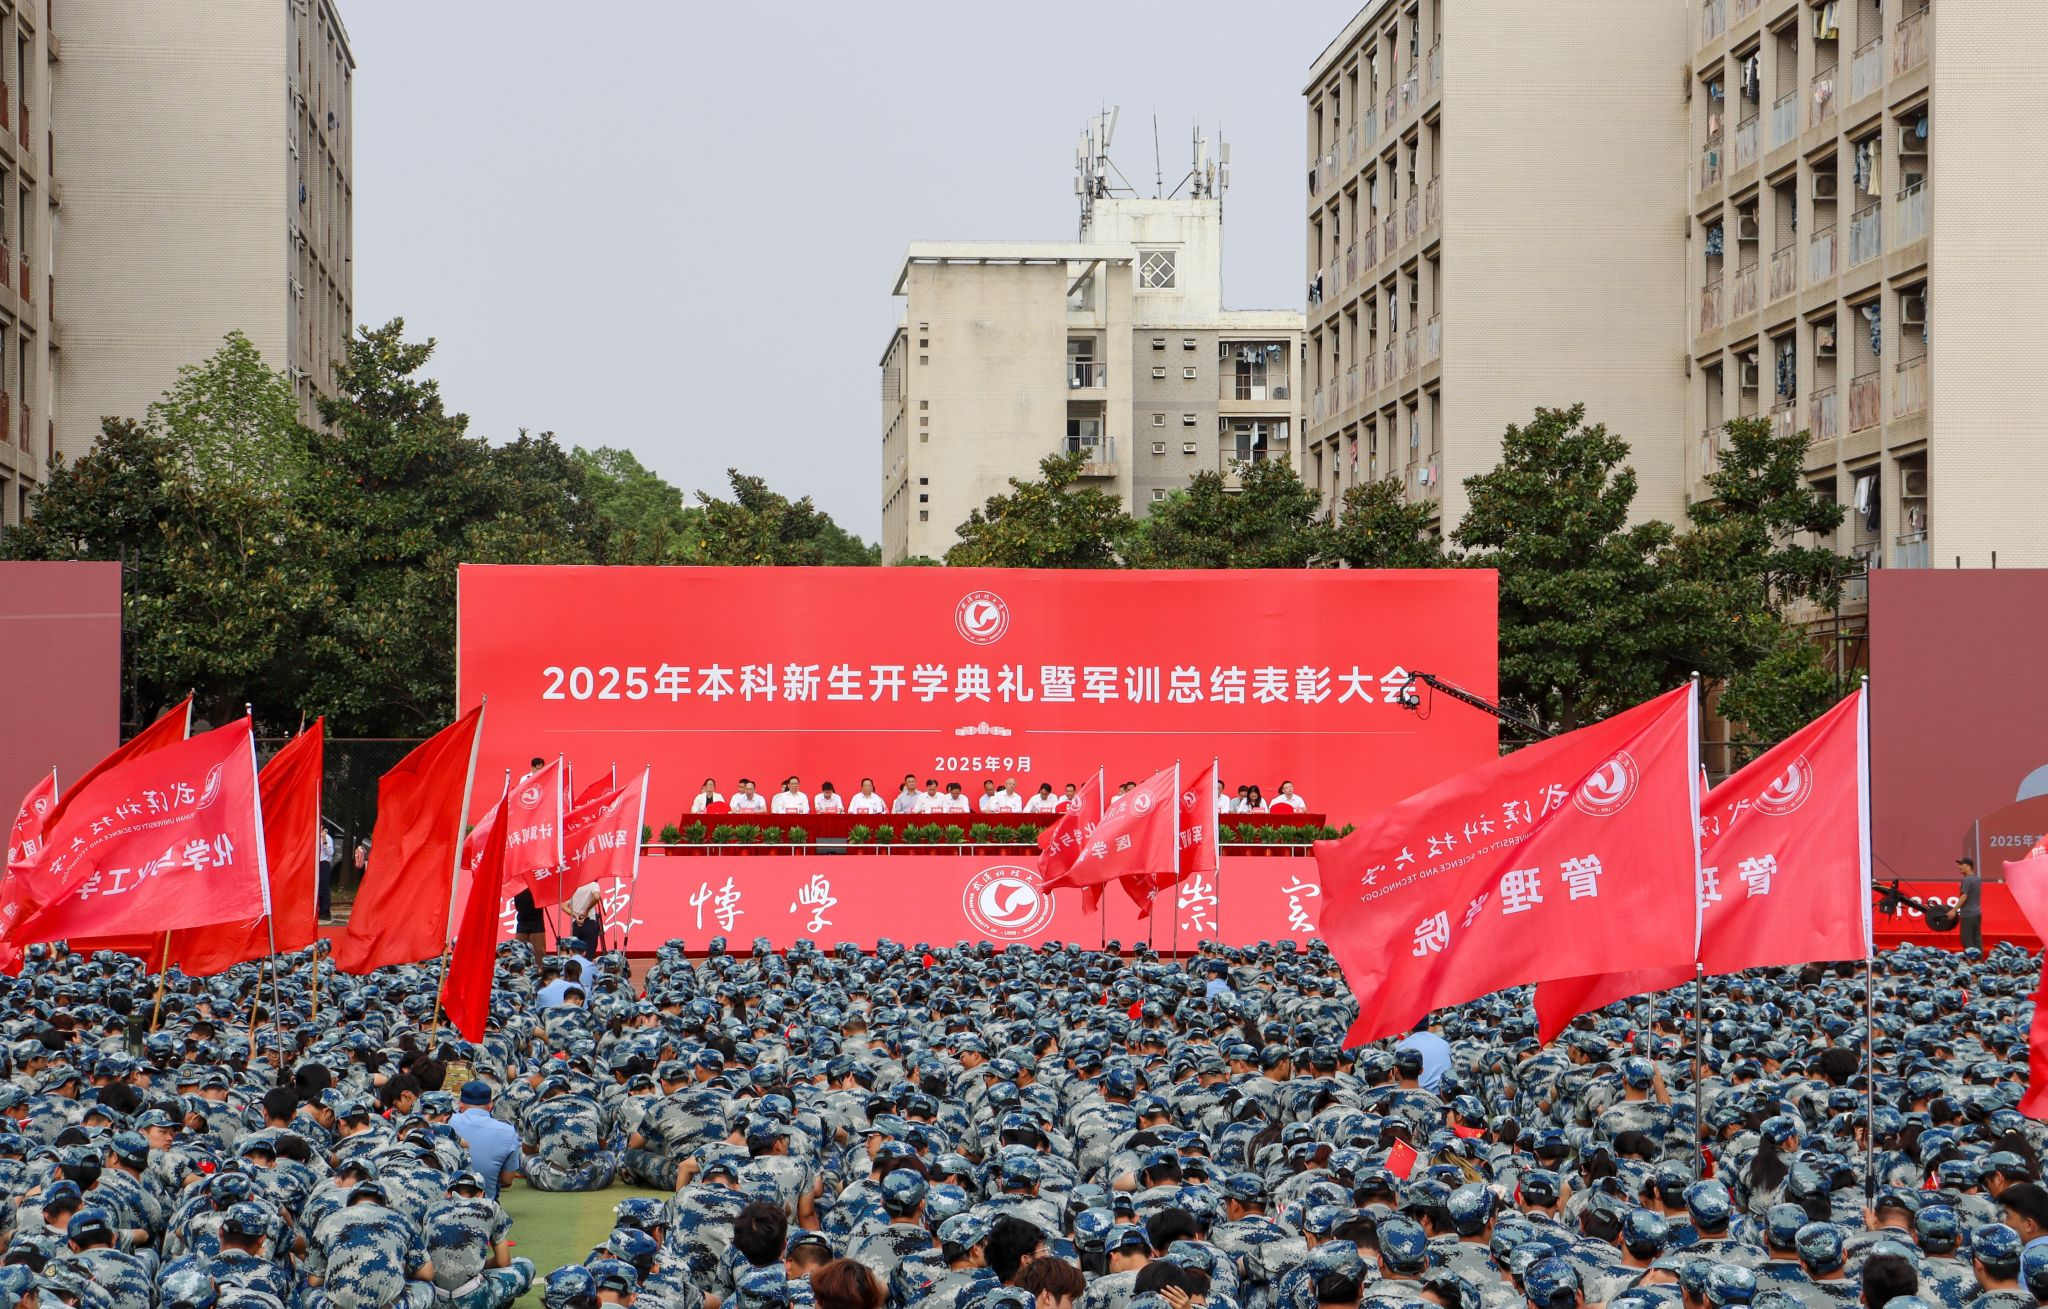

In [ ]:
from PIL import Image
import requests
from io import BytesIO

image_urls = [
    "https://www.wust.edu.cn/__local/F/0A/92/F0D643C2ACBC469A9DA32EBAC6D_B97FE124_9518B.jpg",
    "https://www.wust.edu.cn/__local/C/02/0B/6D20CEF3C031B554C147BBFDF7F_16851543_668A5.jpg"
]

images = []
for url in image_urls:
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36" 
    }
    response = requests.get(url,headers=headers)
    image = Image.open(BytesIO(response.content)).convert("RGB")
    images.append(image)
images[0]

In [19]:
# https://bailian.console.aliyun.com/?tab=model#/model-market/detail/qwen3-vl-flash
# https://cloud.siliconflow.cn/me/models?tags=%E8%A7%86%E8%A7%89
model = OpenAIServerModel(
    model_id="qwen3-vl-flash",
    api_base=os.getenv("DASHSCOPE_API_BASE"),
    api_key=os.getenv("DASHSCOPE_API_KEY")
)

# Instantiate the agent
agent = CodeAgent(
    tools=[],
    model=model,
    max_steps=20,
    verbosity_level=2
)

response = agent.run(
    f"""
    Describe the scene in the photos and return the location in JSON format. Always answer in Chinese.
    e.g. {{
        "desc": <FILL HERE>,
        "where": <FILL HERE>,
    }}
    """,
    images=images
)

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Describe the scene in the photos and return the location in JSON format. Always answer in Chinese.              │
│     e.g. {                                                                                                      │
│         "desc": <FILL HERE>,                                                                                    │
│         "where": <FILL HERE>,                                                                                   │
│     }                                                                                                           │
│                                                                                                                 │
╰─ OpenAIServerModel - qwen3-vl-flash ────────────────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Output message of the LLM: ────────────────────────────────────────────────────────────────────────────────────────
Thought: I need to describe the scene in the photos and determine the location. The text on the banners in the     
images mentions "武汉科技大学" (Wuhan University of Science and Technology), which gives a strong clue about the   
location. I will use this information to construct the JSON output as required.                                    
                                                                                                                   
<code>                                                                                                             
# Extracting the location from the banner text                                                                     
location = "武汉科技大学"                                                                                          
                                                                                                                   
# Describing the scene based on visual elements                                                                    
scene_description =                                                                                                
"图片展示了一群穿着迷彩服的学生在操场上进行军训活动，背景是红色的横幅，上面写着‘2025年本科新生开学典礼暨军训总结表 
彰大会’，并有武汉科技大学的校名。学生们整齐列队，部分学生在进行队列训练或武术动作表演。现场气氛庄重而热烈。"       
                                                                                                                   
# Returning the result in the required JSON format                                                                 
result = {                                                                                                         
    "desc": scene_description,                                                                                     
    "where": location                                                                                              
}                                                                                                                  
                                                                                                                   
final_answer(result)                                                                                               
                                                                                                                   

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  # Extracting the location from the banner text                                                                   
  location = "武汉科技大学"                                                                                        
                                                                                                                   
  # Describing the scene based on visual elements                                                                  
  scene_description =                                                                                              
  "图片展示了一群穿着迷彩服的学生在操场上进行军训活动，背景是红色的横幅，上面写着‘2025年本科新生开学典礼暨军训总   
  结表彰大会’，并有武汉科技大学的校名。学生们整齐列队，部分学生在进行队列训练或武术动作表演。现场气氛庄重而热烈。  
  "                                                                                                                
                                                                                                                   
  # Returning the result in the required JSON format                                                               
  result = {                                                                                                       
      "desc": scene_description,                                                                                   
      "where": location                                                                                            
  }                                                                                                                
                                                                                                                   
  final_answer(result)                                                                                             
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Final answer: {'desc': 
'图片展示了一群穿着迷彩服的学生在操场上进行军训活动，背景是红色的横幅，上面写着‘2025年本科新生开学典礼暨军训总结表
彰大会’，并有武汉科技大学的校名。学生们整齐列队，部分学生在进行队列训练或武术动作表演。现场气氛庄重而热烈。', 
'where': '武汉科技大学'}

[Step 1: Duration 13.71 seconds| Input tokens: 7,095 | Output tokens: 202]

# Computer Use?

repo: https://github.com/anthropics/claude-quickstarts/tree/main/computer-use-demo/computer_use_demo

```bash
docker run \ 
    -e ANTHROPIC_BASE_URL=$ANTHROPIC_BASE_URL \
    -e ANTHROPIC_API_KEY=$ANTHROPIC_API_KEY \
    -v $HOME/.anthropic:/home/computeruse/.anthropic \
    -p 5900:5900 \
    -p 8501:8501 \
    -p 6080:6080 \
    -p 8080:8080 \
    -it ghcr.io/anthropics/anthropic-quickstarts:computer-use-demo-e373524
```